In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-4, 5, 1)

In [3]:
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [4]:
y = np.array((x >= -2) & (x <= 2), dtype="int")
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

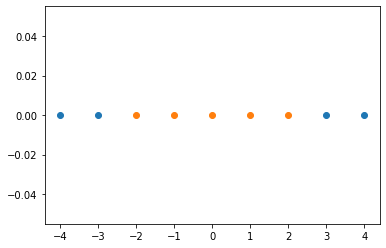

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x[y==0], [0] * len(x[y==0]))
plt.scatter(x[y==1], [0] * len(x[y==1]))
plt.show()

In [9]:
def gaussian(x, l):
    gamma = 0.1
    return np.exp(-gamma *(x-l)**2)

In [10]:
l1, l2 = -1, 1
X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)

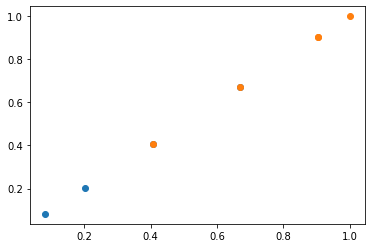

In [14]:
plt.scatter(X_new[y==0, 0], X_new[y==0, 1])
plt.scatter(X_new[y==1, 0], X_new[y==1, 1])
plt.show()

# scikit-learn中的rbf

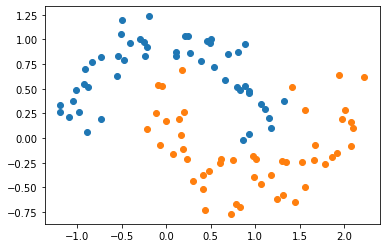

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [18]:
rbf_svc = RBFKernelSVC()
rbf_svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=1.0))])

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


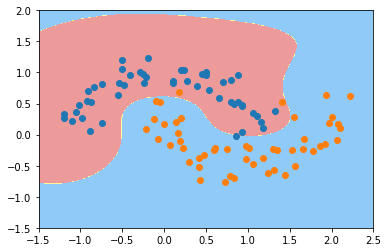

In [20]:
def plot_desicion_boundry(model, axis):
    # axis 横纵坐标轴的范围
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])* 100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#ED9A9A","#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
plot_desicion_boundry(rbf_svc, [-1.5, 2.5, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [21]:
rbf_svc100 = RBFKernelSVC(gamma=100)
rbf_svc100.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=100))])

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


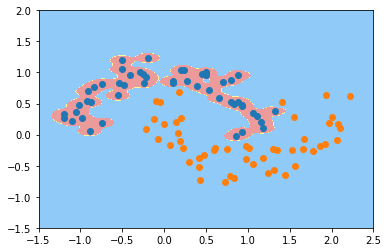

In [22]:
plot_desicion_boundry(rbf_svc100, [-1.5, 2.5, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()
# gamma越大， 分布越窄，所以每个点几乎都有一个边界

In [23]:
rbf_svc10 = RBFKernelSVC(gamma=10)
rbf_svc10.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=10))])

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


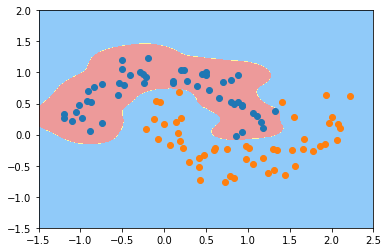

In [24]:
plot_desicion_boundry(rbf_svc10, [-1.5, 2.5, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [25]:
rbf_svc05 = RBFKernelSVC(gamma=0.5)
rbf_svc05.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=0.5))])

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


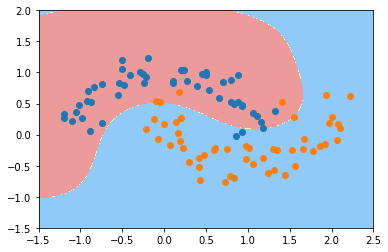

In [27]:
plot_desicion_boundry(rbf_svc05, [-1.5, 2.5, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [28]:
rbf_svc01 = RBFKernelSVC(gamma=0.1)
rbf_svc01.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=0.1))])

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


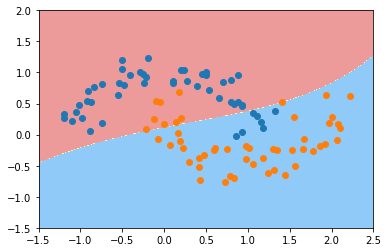

In [29]:
plot_desicion_boundry(rbf_svc01, [-1.5, 2.5, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()